# Ford GoBike System Data Exploration
## by Kevin Wang

## Preliminary Wrangling

This document explores a dataset containing datetime, locations and other information of a bike-sharing system for approximately 1,732,358  trip records from January to Noverber in 2018.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import os, zipfile

%matplotlib inline

In [2]:
# Unzip files
dir_name=os.path.join(os.getcwd(),'dataset')
for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith('.zip'): 
        file_name = os.path.join(dir_name, item)
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall(dir_name)
# load in the dataset into a pandas dataframe
# Create an empty dataframe
trips = pd.DataFrame()
# Load all data by month in loop
for i in range(11):
    df = pd.read_csv(os.path.join(dir_name,'2018{:0>2d}-fordgobike-tripdata.csv'.format(i+1)))
    trips = trips.append(df, ignore_index = True)

In [3]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732358 entries, 0 to 1732357
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 211.5+ MB


In [4]:
trips.info()
trips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732358 entries, 0 to 1732357
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 211.5+ MB


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [5]:
trips.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.732358e+06,1.720779e+06,1.732358e+06,1.732358e+06,1.720779e+06,1.732358e+06,1.732358e+06,1.732358e+06,1.626651e+06
mean,8.638714e+02,1.187221e+02,3.776686e+01,-1.223491e+02,1.172679e+02,3.776698e+01,-1.223486e+02,2.230304e+03,1.983042e+03
std,2.410764e+03,9.958724e+01,1.056814e-01,1.681671e-01,9.965282e+01,1.055627e-01,1.677678e-01,1.225680e+03,1.043766e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.510000e+02,3.100000e+01,3.777106e+01,-1.224113e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.201000e+03,1.978000e+03
50%,5.570000e+02,8.800000e+01,3.778107e+01,-1.223974e+02,8.700000e+01,3.778127e+01,-1.223971e+02,2.293000e+03,1.985000e+03
75%,8.740000e+02,1.830000e+02,3.779625e+01,-1.222856e+02,1.830000e+02,3.779728e+01,-1.222887e+02,3.255000e+03,1.990000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,4.466000e+03,2.000000e+03


In [6]:
trips.groupby(['user_type','member_gender']).count()

duration_sec  start_time  end_time  \
user_type  member_gender                                       
Customer   Female                60126       60126     60126   
           Male                 124462      124462    124462   
           Other                  3801        3801      3801   
Subscriber Female               348636      348636    348636   
           Male                1068748     1068748   1068748   
           Other                 21229       21229     21229   

                          start_station_id  start_station_name  \
user_type  member_gender                                         
Customer   Female                    59300               59300   
           Male                     122358              122358   
           Other                      3766                3766   
Subscriber Female                   346672              346672   
           Male                    1062463             1062463   
           Other                     21186               21186   

                          start_station_latitude  start_station_longitude  \
user_type  member_gender                                                    
Customer   Female                          60126                    60126   
           Male                           124462                   124462   
           Other                            3801                     3801   
Subscriber Female                         348636                   348636   
           Male                          1068748                  1068748   
           Other                           21229                    21229   

                          end_station_id  end_station_name  \
user_type  member_gender                                     
Customer   Female                  59300             59300   
           Male                   122358            122358   
           Other                    3766              3766   
Subscriber Female                 346672            346672   
           Male                  1062463           1062463   
           Other                   21186             21186   

                          end_station_latitude  end_station_longitude  \
user_type  member_gender                                                
Customer   Female                        60126                  60126   
           Male                         124462                 124462   
           Other                          3801                   3801   
Subscriber Female                       348636                 348636   
           Male                        1068748                1068748   
           Other                         21229                  21229   

                          bike_id  member_birth_year  bike_share_for_all_trip  
user_type  member_gender                                                       
Customer   Female           60126              60126                    60126  
           Male            124462             124462                   124462  
           Other             3801               3801                     3801  
Subscriber Female          348636             348285                   348636  
           Male           1068748            1068748                  1068748  
           Other            21229              21229                    21229

In [7]:
trips[trips.start_station_id.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
623364,5572,2018-06-30 20:58:31.8550,2018-06-30 22:31:24.5930,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4202,Customer,1989.0,Male,No
623376,573,2018-06-30 22:12:27.5110,2018-06-30 22:22:01.1740,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4095,Subscriber,1994.0,Male,Yes
623393,850,2018-06-30 22:01:25.5850,2018-06-30 22:15:36.1510,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4122,Customer,1990.0,Male,No
623429,562,2018-06-30 21:52:05.1180,2018-06-30 22:01:27.4400,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4184,Subscriber,1989.0,Male,No
623456,819,2018-06-30 21:37:34.5060,2018-06-30 21:51:13.7290,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4137,Customer,1985.0,Male,No
623472,1176,2018-06-30 21:23:30.4880,2018-06-30 21:43:07.3310,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.94,4152,Customer,1961.0,Male,No
623479,160,2018-06-30 21:37:50.9260,2018-06-30 21:40:30.9300,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4105,Subscriber,1990.0,Female,No
623548,7242,2018-06-30 19:19:19.5600,2018-06-30 21:20:02.1110,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4082,Customer,1990.0,Male,No
623549,725,2018-06-30 21:06:44.3580,2018-06-30 21:18:50.2180,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.96,4156,Customer,1983.0,Male,No
623550,694,2018-06-30 21:05:49.6180,2018-06-30 21:17:24.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.41,-121.94,4136,Customer,1987.0,Female,No


In [8]:
trips[trips.end_station_id.isna()].count()[0]

11579

In terms of the system policy, the use of a Bicycle is limited to a period of 24 consecutive hours. Any use that exceeds a period of 24 consecutive hours is deemed a disappearance of the Bicycle[1](https://assets.fordgobike.com/terms.html).

In [9]:
# Check trips of which duration is over 24 hours
trips[trips.duration_sec>=24*60*60]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


#### Clean Data

##### Convert the columns to proper data types:
* Convert start_time and end_time to datatime.
* Convert the user_type and member_gender to categorical data type.
* Convert the id fields (bike_id, start_station_id, end_station_id) to the string type.

##### Feature engineering
Add new columns to get the hour of the day, the day of week and the month of the year.
* Define functions to get the interested data: the hour of the day, the day of week and the month of the year.
* Apply function to the dataframe to get the values for each row.
* Convert the new columns (start_hour, start_day_of_week, start_month) to the categorical and ordinal type.  

##### Check the data quality on duration_sec column
* Get records of which the start_time is later than the end_time and swap them.
* Re-calculate the duration in seconds by formula: duration = end_time - start_time
* Replace the wrong duration data with the right one.

In [10]:
# Copy the original data
trips_clean = trips.copy()

In [11]:
# Convert the start_time and end_time to datetime type
trips_clean['start_time'] = pd.to_datetime(trips_clean['start_time'])
trips_clean['end_time'] = pd.to_datetime(trips_clean['end_time'])

In [12]:
# Conver the user_type to categorical data type
trips_clean['user_type'] = trips_clean['user_type'].astype('category')
# Convert the member_gender to categorical data type
trips_clean['member_gender'] = trips_clean['member_gender'].astype('category')

In [13]:
# Convert the id columns (bike_id, start_station_id, end_station_id) to string
trips_clean['bike_id'] = trips_clean['bike_id'].apply(lambda x: '{:.0f}'.format(x) if pd.isnull(x)==False else x)
trips_clean['start_station_id'] = trips_clean['start_station_id'].apply(lambda x: '{:.0f}'.format(x) if pd.isnull(x)==False else x)
trips_clean['end_station_id'] = trips_clean['end_station_id'].apply(lambda x: '{:.0f}'.format(x) if pd.isnull(x)==False else x)

In [14]:
# Define function to get the hour of day
def get_hour(dt):
    return dt.time().strftime('%H')

In [15]:
# Define function to get the day of week
def get_weekday(dt):
    return dt.date().strftime('%a')

In [16]:
# Define function to get the month of year
def get_month(dt):
    return dt.date().strftime('%b')

In [17]:
# Feature engineering: Add new column to get the part of day
trips_clean['start_hour'] = trips_clean['start_time'].apply(get_hour)
trips_clean['end_hour'] = trips_clean['end_time'].apply(get_hour)

In [18]:
# Feature engineering: Add new column to calculate the day of week
trips_clean['start_day_of_week'] = trips_clean['start_time'].apply(get_weekday)
trips_clean['end_day_of_week'] = trips_clean['end_time'].apply(get_weekday)

In [19]:
# Feature engineering: Add new column to calculate the month of year
trips_clean['start_month'] = trips_clean['start_time'].apply(get_month)
trips_clean['end_month'] = trips_clean['end_time'].apply(get_month)

In [20]:
# Conver the start_hour and end_part_of_day to categorical data type
trips_clean['start_hour'] = trips_clean['start_hour'].astype('category')
trips_clean['end_hour'] = trips_clean['end_hour'].astype('category')
# Convert the start_day_of_week and end_day_of_week to categorical data type
trips_clean['start_day_of_week'] = trips_clean['start_day_of_week'].astype('category')
trips_clean['end_day_of_week'] = trips_clean['end_day_of_week'].astype('category')

In [21]:
# Conver the start_part_of_day and end_part_of_day to ordinal data type
# Convert the start_day_of_week and end_day_of_week to ordinal data type
ordinal_var_dict = {'hour': ['{:0>2d}'.format(v) for v in np.arange(0,24)],
                    'day_of_week': ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
                    'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    trips_clean['start_'+var] = trips_clean['start_'+var].astype(ordered_var)
    trips_clean['end_'+var] = trips_clean['end_'+var].astype(ordered_var)

In [22]:
trips_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732358 entries, 0 to 1732357
Data columns (total 22 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    object
start_hour                 category
end_hour                   category
start_day_of_week          category
end_day_of_week            category
start_month                category
end_month                  category
dtypes: category(8), datetime64[ns](2), float64(5), int64(1), object(6)
memory usage: 198.3+ MB


In [23]:
trips_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour,start_day_of_week,end_day_of_week,start_month,end_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,22,19,Wed,Thu,Jan,Feb
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,NaN,NaN,No,16,15,Wed,Thu,Jan,Feb
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,14,10,Wed,Thu,Jan,Feb
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,...,Customer,NaN,NaN,No,14,07,Wed,Thu,Jan,Feb
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,19,06,Wed,Thu,Jan,Feb


The start_time should be ealier than the end_time, so the records that end_time-start_time>0 will be swapped the values of start_time and end_time.

As the duration_sec = end_time-start_time (in seconds), new column is addd to calculate the true duration and compare with the original duration_sec.

In [24]:
# Check the duration quality
trips_clean.query('start_time>end_time')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour,start_day_of_week,end_day_of_week,start_month,end_month
1713638,475,2018-11-04 01:59:54.978,2018-11-04 01:07:50.610,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,37,2nd St at Folsom St,37.785000,...,Customer,1991.0,Male,No,01,01,Sun,Sun,Nov,Nov
1713639,956,2018-11-04 01:51:00.396,2018-11-04 01:06:56.722,183,Telegraph Ave at 19th St,37.808702,-122.269927,149,Emeryville Town Hall,37.831275,...,Subscriber,1988.0,Male,No,01,01,Sun,Sun,Nov,Nov
1713640,878,2018-11-04 01:48:20.009,2018-11-04 01:02:58.882,59,S Van Ness Ave at Market St,37.774814,-122.418954,27,Beale St at Harrison St,37.788059,...,Subscriber,1995.0,Male,No,01,01,Sun,Sun,Nov,Nov
1713641,226,2018-11-04 01:59:01.906,2018-11-04 01:02:48.804,41,Golden Gate Ave at Polk St,37.781270,-122.418740,61,Howard St at 8th St,37.776513,...,Subscriber,1986.0,Male,No,01,01,Sun,Sun,Nov,Nov
1713642,586,2018-11-04 01:52:40.494,2018-11-04 01:02:27.156,375,Grove St at Masonic Ave,37.774836,-122.446546,95,Sanchez St at 15th St,37.766219,...,Subscriber,1981.0,Male,No,01,01,Sun,Sun,Nov,Nov
1713643,170,2018-11-04 01:58:47.745,2018-11-04 01:01:38.215,132,24th St at Chattanooga St,37.751819,-122.426614,134,Valencia St at 24th St,37.752428,...,Subscriber,1988.0,Male,No,01,01,Sun,Sun,Nov,Nov


In [25]:
# Check the records of which the start_time is greater than end_time. Swap the start_time and end_time if exist.
for i, row in trips_clean.query('start_time>end_time').iterrows():
    trips_clean.loc[i,['start_time','end_time']] = trips_clean.loc[i,['end_time','start_time']].values
# Check the result
trips_clean.query('start_time>end_time')    

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour,start_day_of_week,end_day_of_week,start_month,end_month


In [26]:
# Add new column 'calc_dur_sec' to calculate the true duration
trips_clean['calc_dur_sec'] = trips_clean.apply(lambda r: (r.end_time-r.start_time).seconds/60*60, axis=1)

In [27]:
# Check the records which the duration_sec not equal to the calc_dur_sec
trips_clean.query('duration_sec!=calc_dur_sec')[['duration_sec','calc_dur_sec','start_time','end_time']]

,duration_sec,calc_dur_sec,start_time,end_time
8,996,996.0,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674
71,962,962.0,2018-01-31 22:06:20.323,2018-01-31 22:22:22.772
113,245,245.0,2018-01-31 21:47:15.487,2018-01-31 21:51:21.209
143,980,980.0,2018-01-31 21:21:39.419,2018-01-31 21:37:59.457
162,2043,2043.0,2018-01-31 20:53:48.756,2018-01-31 21:27:52.265
167,980,980.0,2018-01-31 21:10:20.772,2018-01-31 21:26:40.976
207,511,511.0,2018-01-31 21:01:37.141,2018-01-31 21:10:08.258
210,505,505.0,2018-01-31 20:59:56.295,2018-01-31 21:08:22.192
249,985,985.0,2018-01-31 20:34:34.323,2018-01-31 20:51:00.174
252,481,481.0,2018-01-31 20:41:24.341,2018-01-31 20:49:25.994


In [28]:
# copy the calc_dur_sec value to duration_sec
trips_clean['duration_sec'] = trips_clean['calc_dur_sec']
# Check the duration_sec again
trips_clean.query('duration_sec!=calc_dur_sec')
# Drop the temperal column
trips_clean.drop(columns=['calc_dur_sec'], inplace=True)

In [29]:
trips_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour,start_day_of_week,end_day_of_week,start_month,end_month
0,75284.0,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,22,19,Wed,Thu,Jan,Feb
1,85422.0,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,NaN,NaN,No,16,15,Wed,Thu,Jan,Feb
2,71576.0,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,14,10,Wed,Thu,Jan,Feb
3,61076.0,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,...,Customer,NaN,NaN,No,14,07,Wed,Thu,Jan,Feb
4,39966.0,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,19,06,Wed,Thu,Jan,Feb


### What is the structure of your dataset?

There are 1,732,358 trips in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). These variables includes following data types:

*Numeric*: duration_sec, start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, bike_id, member_birth_year<br>
*String*: start_station_name, end_station_name<br>
*Datetime*: start_time, end_time -> format: YYYY-mm-dd HH:MM:SS.ffff<br>
*Categorical*: user_type(Subscriber, Customer), member_gender(Male, Female, Other)

### What is/are the main feature(s) of interest in your dataset?

* Average duration of trips in terms of time of the day, day of the week, or month of the year.
* When are most trips taken in terms of time of the day, day of the week, or month of the year.
* Does the above depend on if a user is a subscriber or customer?
* Does the above depend on user's gender?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The start_time can get the time of day, day of week and month of year information when people use bikes.  
The duration statistic data can be gotten from the duration_sec column by applying different criteria.  
The gender and user type can help to check the more insight for above information.  

## Univariate Exploration


In this section, the following explorations are performed:
* The histogram (standard-scaled) of the duration of trips.
* The histogram of the duration with the logarithm transformation on the duration_sec column.
* Explore the count of trips in terms of time of the day, day of the week and month of the year.
* Explore the count of trips in terms of the user type and user gender.

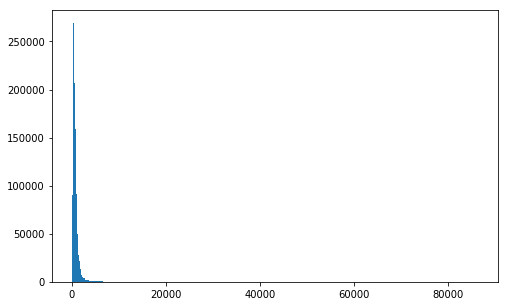

In [30]:
# Explore the duration of trips with a standard-scaled plot
# Define bins by min and max values from the duration_sec and set bin size to 120
dur_sec_bins = np.arange(trips_clean['duration_sec'].min(), trips_clean['duration_sec'].max()+120,120)
# dur_min_bins = np.arange(trips_clean['duration_min'].min(), trips_clean['duration_min'].max()+2, 2)
# dur_hour_bins = np.arange(trips_clean['duration_hour'].min(), trips_clean['duration_hour'].max()+0.1, 0.1)
plt.figure(figsize=[8,5])
plt.hist(data=trips_clean, x='duration_sec', bins=dur_sec_bins)
plt.show()

The above histogram shows the large skew and most data are located before 10000 seconds. Setting log scale on x-axis will be done to better show the data distribution.

In [31]:
# Check the statistic data of the duration
trips_clean['duration_sec'].describe()

count    1.732358e+06
mean     8.638863e+02
std      2.410906e+03
min      6.100000e+01
25%      3.510000e+02
50%      5.570000e+02
75%      8.740000e+02
max      8.636600e+04
Name: duration_sec, dtype: float64

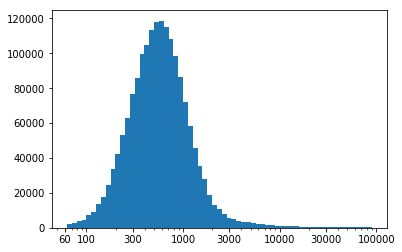

In [32]:
# Define the bins with log transformation
dur_log_bins=10**np.arange(1.8, np.log10(trips_clean['duration_sec'].max())+0.05, 0.05)
plt.hist(data=trips_clean, x='duration_sec', bins=dur_log_bins)
plt.xscale('log')
# Set the x ticks and ticks' labels
dur_log_ticks = [60, 100, 300, 1000, 3000, 10000, 30000, 100000]
plt.xticks(dur_log_ticks, dur_log_ticks)
plt.show()

In [33]:
# Calculate the percentage of the trip number of which the duration is more than 10000 seconds
pct_over_10k = trips_clean[trips_clean['duration_sec']>10000].count()[0]/trips_clean.shape[0]
dur_log_ticks_lim = [60, 100, 300, 1000, 3000, 10000]
pct_over_10k

0.004946437168298931

Above histogram have a better view on the distribution of trips' duration after the 'log' transforming. And we can find it seems follow the normal distribution. Most of the trips continued from 60 to 10000 seconds, or 1 to 167 minutes. But there are some trips that continued more than 10000 seconds (account for less than 0.5%) and those trips will be ignored for explorations about the trip's  duration.

Below, the exploration of number of trips in terms of time of day, day of week and month of the year are performed.

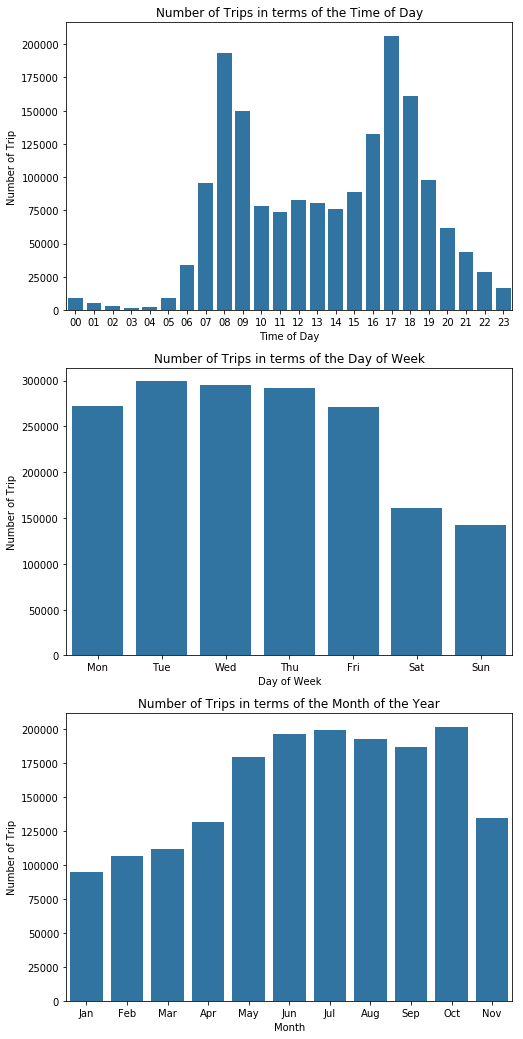

In [34]:
# Define the base color
base_color = sb.color_palette()[0]
# Set the figure size
plt.figure(figsize=[8,18])

plt.subplot(3, 1, 1)
# Explore the trip counts by part of day
sb.countplot(data=trips_clean,x='start_hour',color=base_color)
# Set the title and labels for the subplot
plt.title('Number of Trips in terms of the Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Trip')

plt.subplot(3, 1, 2)
# Explore the trip counts by day of week
sb.countplot(data=trips_clean,x='start_day_of_week',color=base_color)
plt.title('Number of Trips in terms of the Day of Week')
# Set the title and labels for the subplot
plt.xlabel('Day of Week')
plt.ylabel('Number of Trip')

plt.subplot(3, 1, 3)
# Explore the trip counts by month of year
sb.countplot(data=trips_clean,x='start_month',color=base_color)
# Set the title and labels for the subplot
plt.title('Number of Trips in terms of the Month of the Year')
plt.xlabel('Month')
plt.ylabel('Number of Trip')

plt.show()

From above graphs we can get the following information:   
Most trips are taken from 7am to 8pm and the peak hours of the days are 8am-9am and 5pm-6pm. It can easily imagine that the peak hours are the time when people are going to work around 8am and going back after work around 5pm. The least trip that are taken is between 3am-4am.

Most trips are taken on workdays(Mon-Fri). Less trips are taken on the weekends. That may because people have rest on weekends.

The bike sharing is active from May to October. That can be the result of weather conditions as those months have warm weather.

Next, the count of trips in terms of user type and user gender are explored:

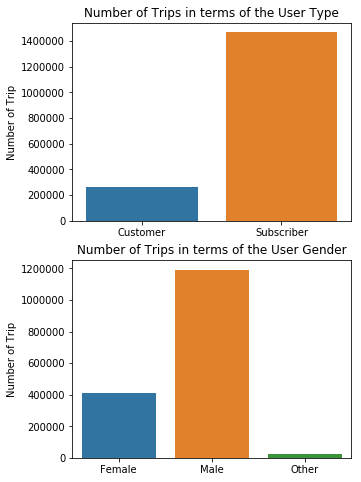

In [35]:
# Set figure size
plt.figure(figsize=[5, 8])
# Define the subplot 
plt.subplot(2, 1, 1)
# Explore the trip counts by user type 
ax = sb.countplot(data=trips_clean, x='user_type')
# Set the title and labels for the subplot
ax.set_title('Number of Trips in terms of the User Type')
ax.set_xlabel('')
ax.set_ylabel('Number of Trip')

# Define the subplot 
plt.subplot(2, 1, 2)
# Explore the trip counts by member's gender
ax = sb.countplot(data=trips_clean, x='member_gender')
# Set the title and labels for the subplot
ax.set_title('Number of Trips in terms of the User Gender')
ax.set_xlabel('')
ax.set_ylabel('Number of Trip')
plt.show()

The above plots show that the member(Subscriber) of this bike sharing system has much more number of trips compared with casual user(Customer). And the main users of this system are registered users.

The male member has the most number of trips. That's may because the male number in this area is more than the female number.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duaration distribution is limited in a large range, so a log transform is introduced to generate the histogram. After the transformation, the duration is likely follow a normal distribution.

Most trips are taken from 7am to 8pm and the peak hours of the days are 8am-9am and 5pm-6pm. Most trips are taken on workdays (Mon-Fri). Less trips are taken on the weekends.  The bike usage is active from May to October.

The main users of this bike sharing system are registered members as they have much more number of trips compared with casual user(customer). The male users have the most number of trips compared with the female and other gender users.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The duration_sec variable have some records that are more than 30000 seconds(8.33 hours). In order to get the true durations, new temporary column is generated to calculate the duration by the formula: duration = end_time-start_time. And assign the calculated results to the duration_sec. After the calculation of the true duration, the records with large durations are still exist, that may because people put the bike in their home overnight and then use it on the second day.

Following tidiness operations are done:
* Convert the start_time and end_time to datetime type in order to get other (time of day, day of week, month) information.
* Convert the user_type and member_gender to categorical type as they are not numerical data.
* Generate the temporary column 'calc_dur_sec' to compute the true duration and correct the original duration_sec column.
* Add new columns 'start_hour', 'end_hour' to represent the corresponding start time (hour)/end time (hour) of day and set the values as the ordinal data type. And the 'start_hour' column is used to explore the number of trips taken in terms of the begin time.
* Add new columns 'start_day_of_week', 'end_day_of_week' to represent the corresponding day of week (e.g. Mon - Sun) and set the valuse as the ordial data type. And the 'start_day_of_week' column is used to explore the number of trips taken in terms of the begin day of week.
* Add new columns 'start_month', 'end_month' to get the corresponding month of trips and set the valuse as the ordial data type. And the 'start_month' column is used to explore the number of trips taken in terms of the begin month.
* The above values on time of day, day of week, month of year are substract from the start_time / end_time column by defining the respective functions.

## Bivariate Exploration


In this section, explorations of the following relationships are performed:

Two categorial variables:
* Heatmap of the number of trips taken in terms of the day of week and the month of the year.
* Heatmap of the number of trips taken in terms of the hour of the day and day of week.
* The count plots for the relationship between the user type and hour of day, day of week and month of the year correspondingly.
* The count plots for the relationship between the user gender and hour of day, day of week and month of the year correspondingly.

One categorial variable and one numerical variable:
* The subplots of box plot for the relationship between the duration and hour of day, day of week and month of the year correspondingly.
* The box plot for the relationship between the duration and the user type.
* The box plot for the relationship between the duration and the member's gender.

In [36]:
# Create pivot table to explore the number of trips in terms of the day_of_week and month of the year.
month_week = trips_clean.pivot_table(index='start_day_of_week', columns='start_month', aggfunc='count')
# Create pivot table to explore the number of trips in terms of the time of day and day of week.
week_hour = trips_clean.pivot_table(index='start_day_of_week', columns='start_hour', aggfunc='count')

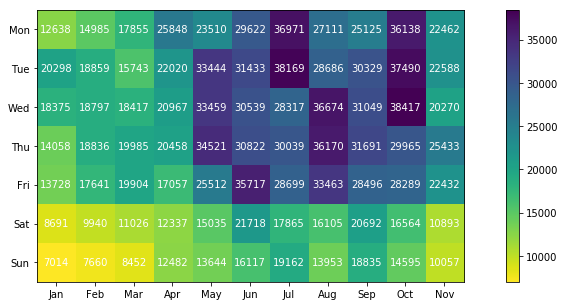

In [37]:
# Set the figure size
fig, ax = plt.subplots(figsize=[15, 5])
# Create the heat map by two categorical variables (day_of_week and month of the year)
plt.imshow(month_week['bike_id'], cmap='viridis_r')
# Set x, y ticks
plt.xticks(np.arange(0,11),ordinal_var_dict['month'])
plt.yticks(np.arange(0,7), ordinal_var_dict['day_of_week'])
# Show the trip number on each grid on the heatmap
for i in range(len(ordinal_var_dict['day_of_week'])):
    for j in range(len(ordinal_var_dict['month'])):
        text = ax.text(j, i, month_week['bike_id'].iloc[i,j],
                       ha="center", va="center", color="w")
# Show color bar
plt.colorbar()
plt.show()

The above heatmap shows that on weekday, the trips number is higher than the corresponding weekend on the month level. So next the number of trips in terms of hour of day and day of week is ploted:

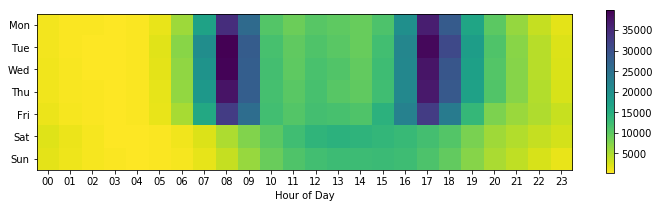

In [38]:
plt.figure(figsize=[12, 3])
# Create the heat map by two categorical variables (day_of_week and month of the year)
plt.imshow(week_hour['bike_id'], cmap='viridis_r')
# Set x, y ticks
plt.xticks(np.arange(0,24), ordinal_var_dict['hour'])
plt.yticks(np.arange(0,7),ordinal_var_dict['day_of_week'])
plt.xlabel('Hour of Day')
plt.colorbar()
plt.show()

The above heatmap shows that 8am-9am and 5pm-6pm are the busiest hour during the Monday to Friday which is consistent with the univariable exploration in previous section. And the time between 12pm-14pm are have the most number of trips on Saturday and Sunday.

Followings are the explorations of the number of trips by considering user type and time of day, day of week and month of the year correspondingly.

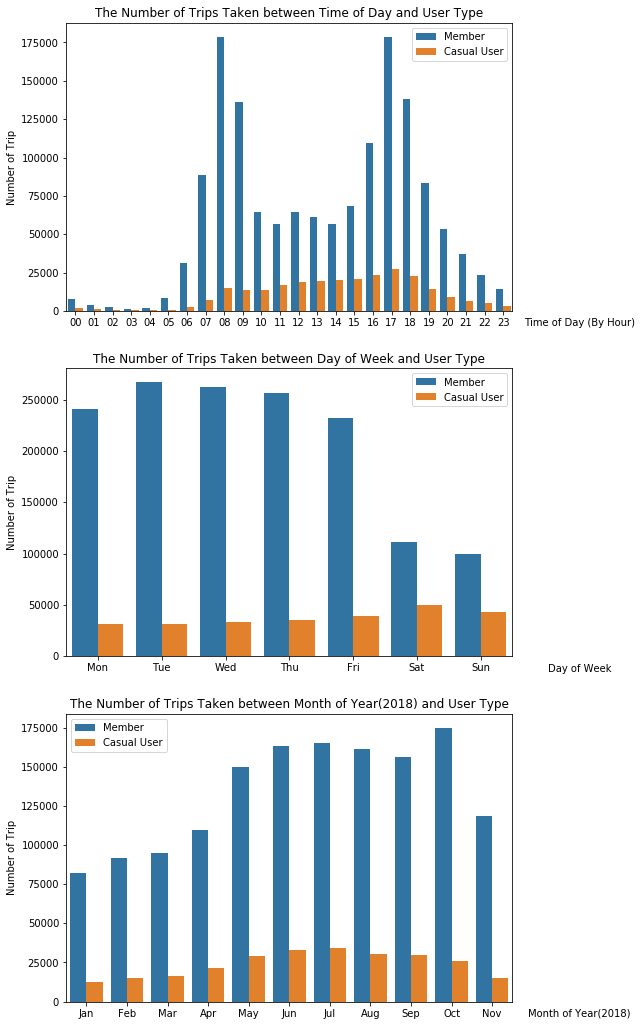

In [39]:
# Set figure size
plt.figure(figsize=[8,18])

ax = plt.subplot(3,1,1)
# Generate the first plot with x=start_hour and group by user_type
sb.countplot(data=trips_clean, x='start_hour', hue='user_type', hue_order=('Subscriber','Customer'))
# Set subplot title and x, y labels
ax.set_title('The Number of Trips Taken between Time of Day and User Type')
ax.set_xlabel('Time of Day (By Hour)')
# Set x label location
ax.xaxis.set_label_coords(1.15, -0.025)
ax.set_ylabel('Number of Trip')
# Set the legend and rename the labels
ax.legend(title='', labels=('Member','Casual User'))

ax = plt.subplot(3,1,2)
# Generate the first plot with x=start_day_of_week and group by user_type
sb.countplot(data=trips_clean, x='start_day_of_week', hue='user_type', hue_order=('Subscriber','Customer'))
ax.set_title('The Number of Trips Taken between Day of Week and User Type')
ax.set_xlabel('Day of Week')
# Set x label location
ax.xaxis.set_label_coords(1.15, -0.025)
ax.set_ylabel('Number of Trip')
ax.legend(title='', labels=('Member','Casual User'))

ax = plt.subplot(3,1,3)
# Generate the first plot with x=start_month and group by user_type
sb.countplot(data=trips_clean, x='start_month', hue='user_type', hue_order=('Subscriber','Customer'))
ax.set_title('The Number of Trips Taken between Month of Year(2018) and User Type')
ax.set_xlabel('Month of Year(2018)')
# Set x label location
ax.xaxis.set_label_coords(1.15, -0.025)
ax.set_ylabel('Number of Trip')
ax.legend(title='', labels=('Member','Casual User'))

plt.show()

From above plots, we can get:
* For system member(Subscriber), plot of trip count in terms of time of day is consistent with the univariable exploration, which the busiest hour is 8am-9am and 5pm-6pm. But for casual user (Customer), the number of trips gradually increase from 9am to the 5pm and then drop gradually from 6pm.
* In terms of day in weeks, the number of trip for the system member (Subscriber) has almost the same trends with that in the univariable exploration. But for casual users (Customer), they took more trips on the weekend compared with the weekday. 
* In terms of month of the year, both the member and casual user have more trips from May to Oct. The most trips are taken on Oct for the member. While for the causal user, the most trips are taken on July.

The explorations on the number of trips by considering member's gender and time of day, day of week and month of the year are discussed below correspondingly.

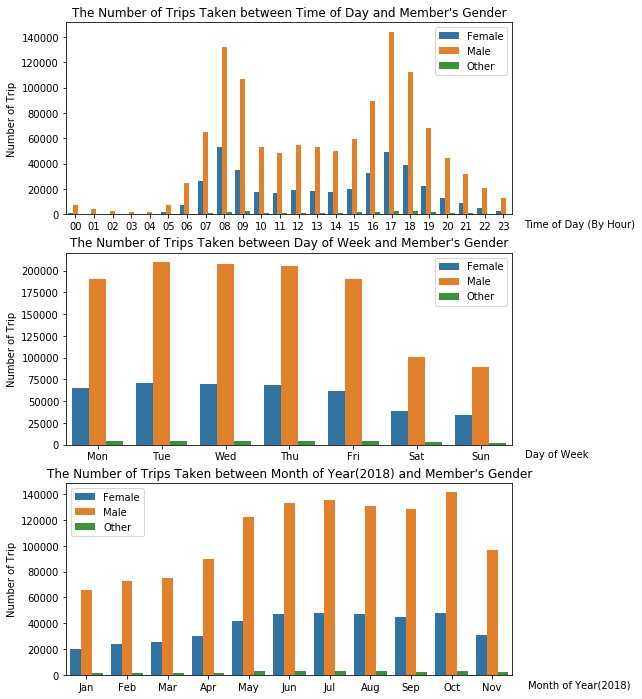

In [40]:
plt.figure(figsize=[8,12])

plt.subplot(3,1,1)
# Generate the first plot with x=start_hour and group by member_gender
ax = sb.countplot(data=trips_clean, x='start_hour', hue='member_gender')
ax.set_title("The Number of Trips Taken between Time of Day and Member's Gender")
ax.set_xlabel('Time of Day (By Hour)')
# Set x label location
ax.xaxis.set_label_coords(1.15, -0.025)
ax.set_ylabel('Number of Trip')
ax.legend(title='')

plt.subplot(3,1,2)
# Generate the first plot with x=start_day_of_week and group by member_gender
ax = sb.countplot(data=trips_clean, x='start_day_of_week', hue='member_gender')
ax.set_title("The Number of Trips Taken between Day of Week and Member's Gender")
ax.set_xlabel('Day of Week')
# Set x label location
ax.xaxis.set_label_coords(1.1, -0.025)
ax.set_ylabel('Number of Trip')
ax.legend(title='')

plt.subplot(3,1,3)
# Generate the first plot with x=start_month and group by member_gender
ax = sb.countplot(data=trips_clean, x='start_month', hue='member_gender')
ax.set_title("The Number of Trips Taken between Month of Year(2018) and Member's Gender")
ax.set_xlabel('Month of Year(2018)')
# Set x label location
ax.xaxis.set_label_coords(1.15, -0.025)
ax.set_ylabel('Number of Trip')
ax.legend(title='')

plt.show()

From above plots, they shows almost the same trends for different genders of members.  

Next, the relationship between duration and the time variables (time of day, day of week and month of the year) are demonstrated correspondingly.

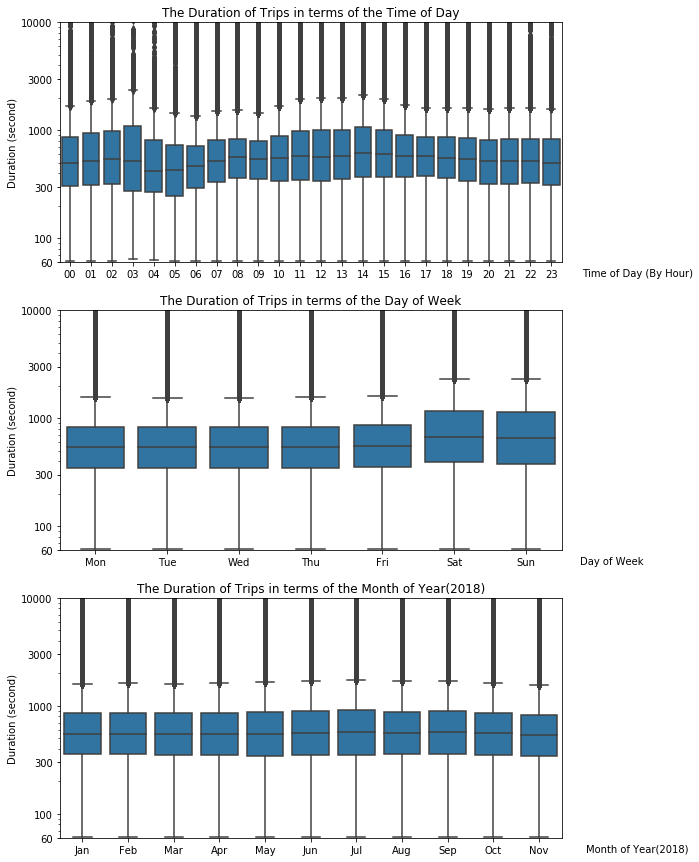

In [41]:
plt.figure(figsize=[9,15])
# Explore the part of day and the duration
ax = plt.subplot(3,1,1)
sb.boxplot(data=trips_clean, x='start_hour', y='duration_sec', color=base_color)
ax.set_yscale('log')
ax.set_ylim(np.array([60, 10000]))
ax.set_yticks(dur_log_ticks_lim)
ax.set_yticklabels(dur_log_ticks_lim)
ax.set_title('The Duration of Trips in terms of the Time of Day')
ax.set_xlabel('Time of Day (By Hour)')
# Set x label location
ax.xaxis.set_label_coords(1.15, -0.025)
ax.set_ylabel('Duration (second)')

# Explore the day of week and the duration
ax = plt.subplot(3,1,2)
sb.boxplot(data=trips_clean, x='start_day_of_week', y='duration_sec', color=base_color)
ax.set_yscale('log')
ax.set_ylim(np.array([60, 10000]))
ax.set_yticks(dur_log_ticks_lim)
ax.set_yticklabels(dur_log_ticks_lim)
ax.set_title('The Duration of Trips in terms of the Day of Week')
ax.set_xlabel('Day of Week')
# Set x label location
ax.xaxis.set_label_coords(1.10, -0.025)
ax.set_ylabel('Duration (second)')

# Explore the month of year and the duration
ax = plt.subplot(3,1,3)
sb.boxplot(data=trips_clean, x='start_month', y='duration_sec', color=base_color)
ax.set_yscale('log')
ax.set_ylim(np.array([60, 10000]))
ax.set_yticks(dur_log_ticks_lim)
ax.set_yticklabels(dur_log_ticks_lim)
ax.set_title('The Duration of Trips in terms of the Month of Year(2018)')
ax.set_xlabel('Month of Year(2018)')
# Set x label location
ax.xaxis.set_label_coords(1.15, -0.025)
ax.set_ylabel('Duration (second)')

plt.show()

The largest differences on trip duration is happend on around 3am. This is a little surprising result as I thought there shouldn't be many ridings on the midnight.

The Saturday and Sunday have the larger statistical data on duration compared with other days of week. That means people spend more time on bike traveling on the weekends. And that needs to investigate in details to check each type of user.  

The duration statistical data on each month is not have much difference excepct that the obvious falling down on Noverber.

Followings will check the relationship between the duration and the user type and member's gender respectively.

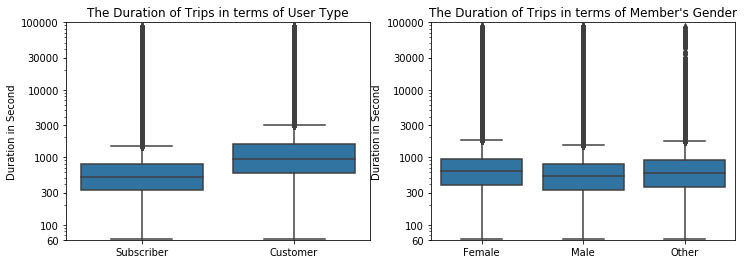

In [42]:
plt.figure(figsize=[12,4])
# Explore the user type and the duration
ax = plt.subplot(1,2,1)
sb.boxplot(data=trips_clean, x='user_type', y='duration_sec', order=('Subscriber','Customer'), color=base_color)
ax.set_yscale('log')
ax.set_ylim(np.array([60, 10000]))
ax.set_title('The Duration of Trips in terms of User Type')
ax.set_yticks(dur_log_ticks)
ax.set_yticklabels(dur_log_ticks)
ax.set_xlabel('')
ax.set_ylabel('Duration in Second')

# Explore the user gender and the duration
ax = plt.subplot(1,2,2)
sb.boxplot(data=trips_clean, x='member_gender', y='duration_sec', color=base_color)
ax.set_yscale('log')
ax.set_ylim(np.array([60, 10000]))
ax.set_title("The Duration of Trips in terms of Member's Gender")
ax.set_yticks(dur_log_ticks)
ax.set_yticklabels(dur_log_ticks)
ax.set_xlabel('')
ax.set_ylabel('Duration in Second')

plt.show()

The casual user have greater statistic data (Max, First Quartile, Median and Third Quartile) on duration than that of member.  
The female member have the greatest statistic data (Max, First Quartile, Median and Third Quartile) on duration of trips and the male member have the least statistic data (Max, First Quartile, Median and Third Quartile).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Relationships between number of trips and time variables:
From Monday to Friday, 8am-9am and 5pm-6pm are the busiest hours that most trips are taken in those period in terms of the time of day. And the time between 12pm-14pm are have the most number of trips taken on Saturday and Sunday.

Relationships on number of trips between user types and time variables:
* For system member(Subscriber), plot of number of trip in terms of time of day is consistent with the univariable exploration, which the busiest hour is 8am-9am and 5pm-6pm. But for casual user (Customer), the number of trips gradually increase from 9am to the 5pm and then drop gradually from 5pm.
* In terms of day in weeks, the number of trips for the system member (Subscriber) has almost the same trends with that in the univariable exploration. But for casual users (Customer), they took more trips on the weekend compared with the weekday. 
* In terms of month of the year, both the member and casual user have more trips from May to Oct. The most trips are taken on Oct for the member. While for the causal user, the most trips are taken on July.

Relationships on number of trips between user gender and time variables:
There are almost the same trends for different genders of members.  

Relationships between trip's duration and time variables:
* The Saturday and Sunday have the larger statistical data on duration compared with other days of week. That means people spend more time on bike traveling on the weekends. And that needs to investigate in details to check each type of user.  
* The duration statistical data on each month is not have much difference excepct that the obvious falling down on Noverber.

Relationships on trip's duration between user types and time variables:
The casual user have greater statistic data (Max, First Quartile, Median and Third Quartile) on duration than that of member.  

Relationships on trip's duration between user gender and time variables:
The female member have the greatest statistic data (Max, First Quartile, Median and Third Quartile) on duration of trips and the male member have the least statistic data (Max, First Quartile, Median and Third Quartile).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

For casual users (Customer), they took more trips on the weekend compared with the weekday.

The Saturday and Sunday have the larger statistical data on duration compared with other days of week. That means people spend more time on bike traveling on the weekends. And that needs to investigate in details to check each type of user. 

## Multivariate Exploration


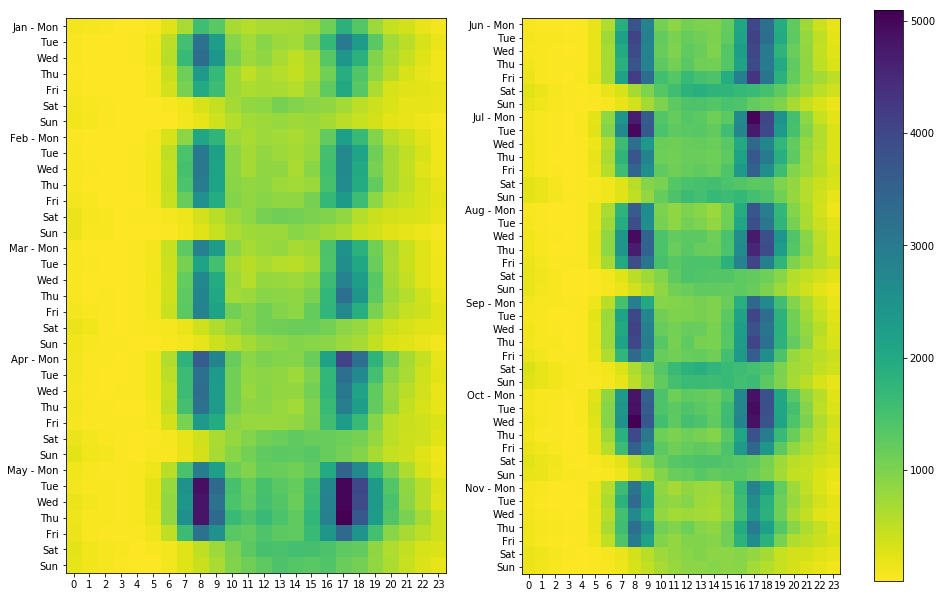

In [43]:
month_week_hour = trips_clean.pivot_table(index=['start_month','start_day_of_week'], columns=['start_hour'], aggfunc='count')

plt.figure(figsize=[15, 30])
ax = plt.subplot(1, 2, 1)
im = plt.imshow(month_week_hour['bike_id'].iloc[0:35], cmap='viridis_r')
ax.set_xticks(np.arange(0,24))
ax.set_yticks(np.arange(0,35))
yticklabels = []
for i in range(0,5):
    for j in range(0,7):
        if j==0:
            yticklabels.append(ordinal_var_dict['month'][i]+' - '+ordinal_var_dict['day_of_week'][j])
        else:
            yticklabels.append(ordinal_var_dict['day_of_week'][j])
ax.set_yticklabels(yticklabels)

ax = plt.subplot(1, 2, 2)
im = plt.imshow(month_week_hour['bike_id'].iloc[35:], cmap='viridis_r')
ax.set_xticks(np.arange(0,24))
ax.set_yticks(np.arange(0,42))
yticklabels = []
for i in range(5,11):
    for j in range(0,7):
        if j==0:
            yticklabels.append(ordinal_var_dict['month'][i]+' - '+ordinal_var_dict['day_of_week'][j])
        else:
            yticklabels.append(ordinal_var_dict['day_of_week'][j])
ax.set_yticklabels(yticklabels)
plt.colorbar(im, fraction=0.075, pad=0.09)
plt.show()

Considering all time variables, I create the heatmap to show the bike uses from Jan-Nov in 2018. The color are darker in the weekdays around 8am and 5pm from May to Oct. Also, on the weekends people often use bike between 10am to 5pm.

Next, I will plot the trip number by considering user types.

In [44]:
# Get the pivot table which is group by start_month, start_day_of_week and user_type
month_week_usertype = trips_clean.pivot_table(index='start_month', columns=['start_day_of_week','user_type'], aggfunc='count')

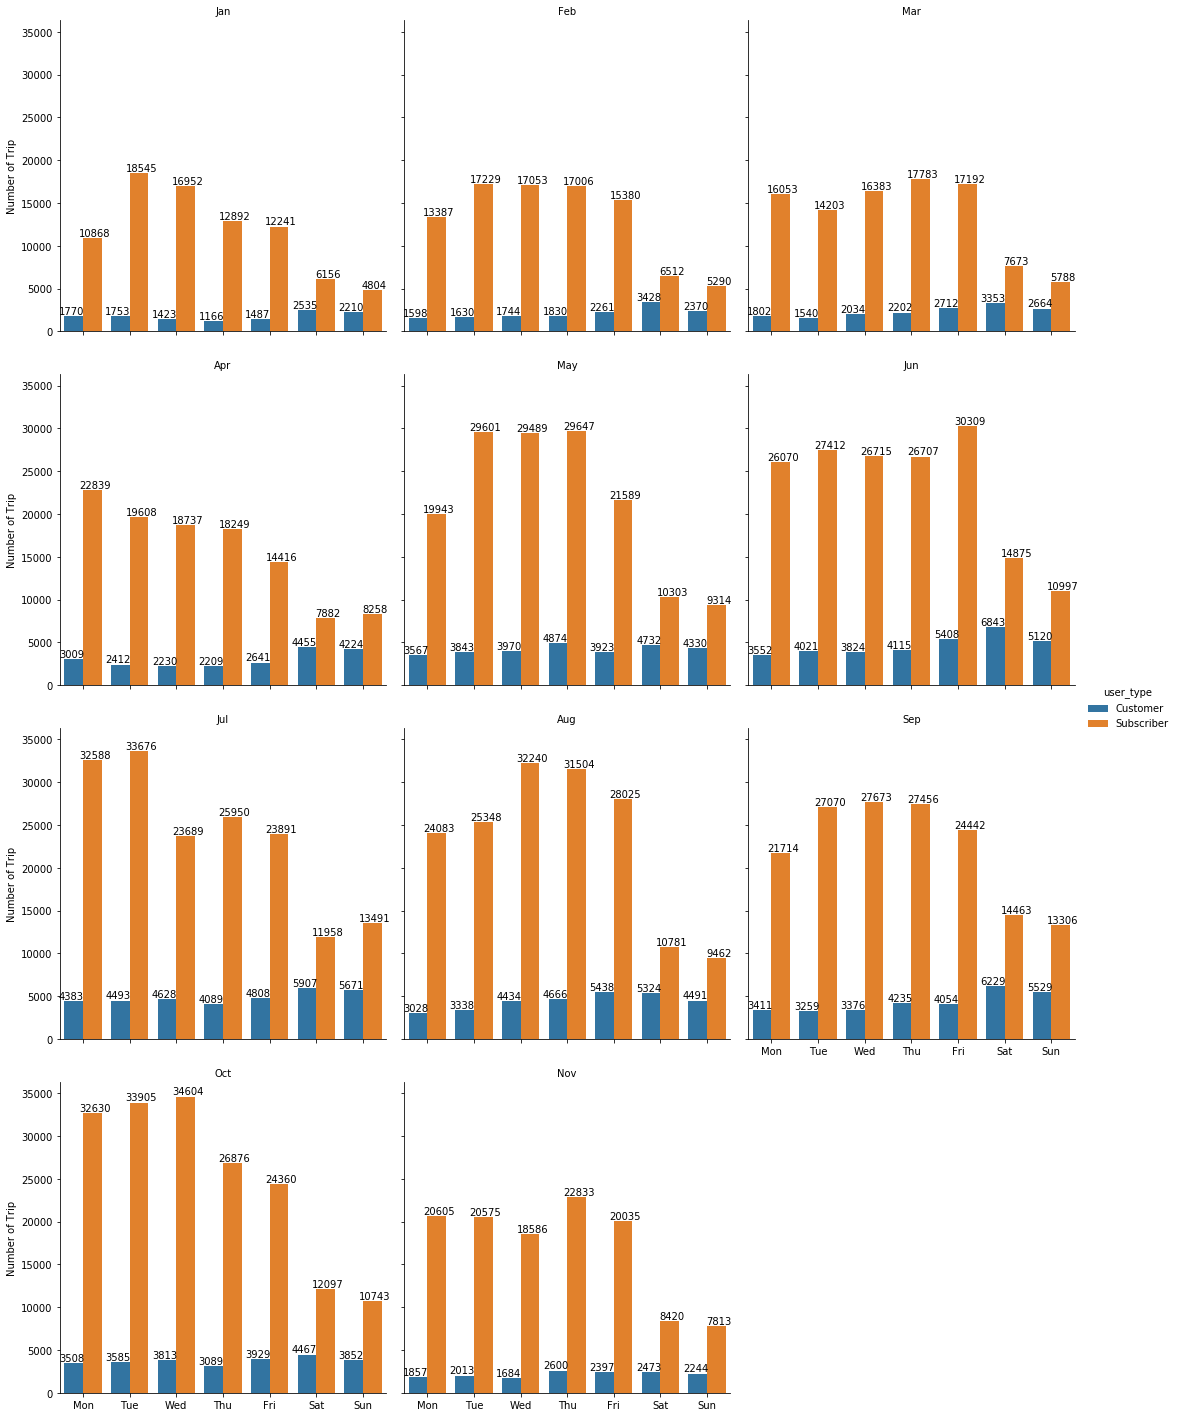

In [45]:
# I tired to use the FacetGrid with the sb.countplot as the function to be passed in the map, but I cannot get the right result.
# So I after searching I got another solution by using he catplot function as below
g = sb.catplot(data=trips_clean, x='start_day_of_week',col='start_month',hue='user_type', kind='count', col_wrap=3)
g.set_titles('{col_name}')
g.set_xlabels('')
g.set_ylabels('Number of Trip')
# Show number of trip on the top of each bar
# Loop month
for i in range(len(ordinal_var_dict['month'])):
    # Loop day of week
    for j in range(len(ordinal_var_dict['day_of_week'])):
        # Get trip number of Customer from the pivot table
        val_cust = month_week_usertype['bike_id'].iloc[i][ordinal_var_dict['day_of_week'][j]]['Customer']
        # Get trip number of Subscriber from the pivot table
        val_subs = month_week_usertype['bike_id'].iloc[i][ordinal_var_dict['day_of_week'][j]]['Subscriber']
        # Show the annotation on top of Customer bars
        g.axes[i].text(j-0.25, val_cust, val_cust, ha="center", va="bottom", color="black")
        # Show the annotation on top of Subscriber bars
        g.axes[i].text(j+0.25, val_subs, val_subs, ha="center", va="bottom", color="black")
plt.show()

We can see from above plots that the casual user have the greater number of trips on weekend almost in every month except the May, August and Noverber but the differences in these exception months are quit small.  
And for the member, the number of trips on weekdays is greater than that of weekends.

Next let's check the relationship on trip duration and user types in terms of day of week from Jan to Nov.

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 2160x2880 with 0 Axes>

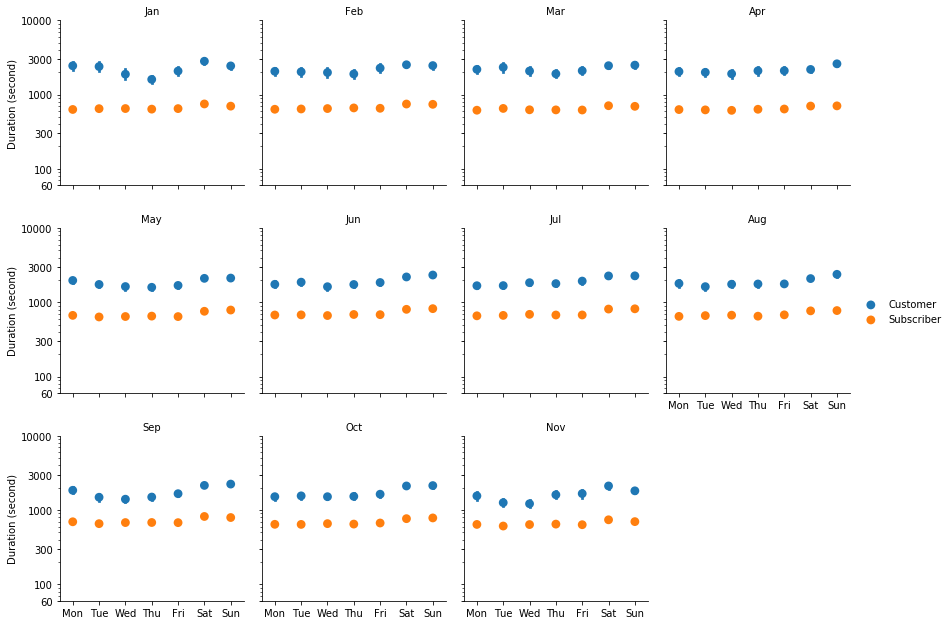

In [46]:
# Set figure size
plt.figure(figsize=[30, 40])
# Create FacetGrid
g = sb.FacetGrid(data=trips_clean, col='start_month', col_wrap=4)
# Pass the point plot as the input function
g.map(sb.pointplot, 'start_day_of_week', 'duration_sec', 'user_type', order=ordinal_var_dict['day_of_week'], 
      hue_order=['Customer','Subscriber'], linestyles = '', palette=sb.color_palette())
# Set y-axis transformation
g.set(yscale='log')
# Set ylim
g.set(ylim = np.array([60, 10000]))
# Set ticks and labels
g.set_titles('{col_name}')
g.set(yticks = dur_log_ticks_lim)
g.set_yticklabels(dur_log_ticks_lim)
g.set_ylabels('Duration (second)')
g.set_xlabels('')
g.add_legend()
plt.show()

There is the clear trends that the duration of trips on weekend is longer than that on weekdays from Jan to Nov no matter for the member or casual user.  
And the duration of casual users is longer than that of the members for each of of days.

<Figure size 4320x2160 with 0 Axes>

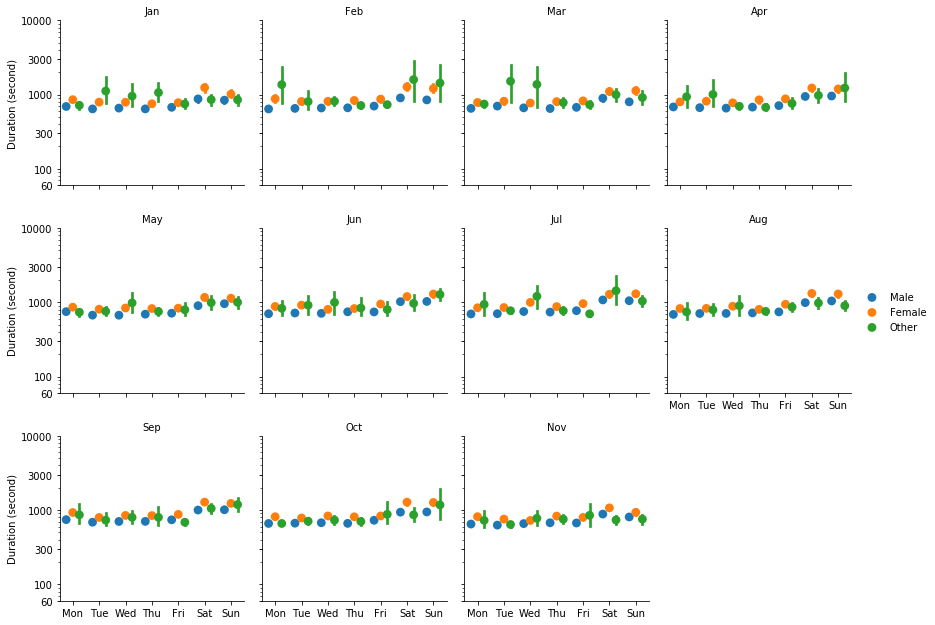

In [47]:
plt.figure(figsize=[60, 30])
g = sb.FacetGrid(data=trips_clean, col='start_month', col_wrap=4)
g.map(sb.pointplot, 'start_day_of_week', 'duration_sec', 'member_gender', order = ordinal_var_dict['day_of_week'], 
      hue_order=['Male','Female', 'Other'], linestyles='', dodge = 0.5, palette=sb.color_palette())
g.set(yscale='log')
g.set(ylim = np.array([60, 10000]))
# Set tick and labels
g.set_titles('{col_name}')
g.set(yticks = dur_log_ticks_lim)
g.set_yticklabels(dur_log_ticks_lim)
g.set_ylabels('Duration (second)')
g.set_xlabels('')
g.add_legend()
plt.show()

The above plots show an interesting thing which is the trip duration of female user is longer than that of male user in each day of week from Jan to Nov 2018. Then let's check the duration for different genders by different user types:

<Figure size 2160x8640 with 0 Axes>

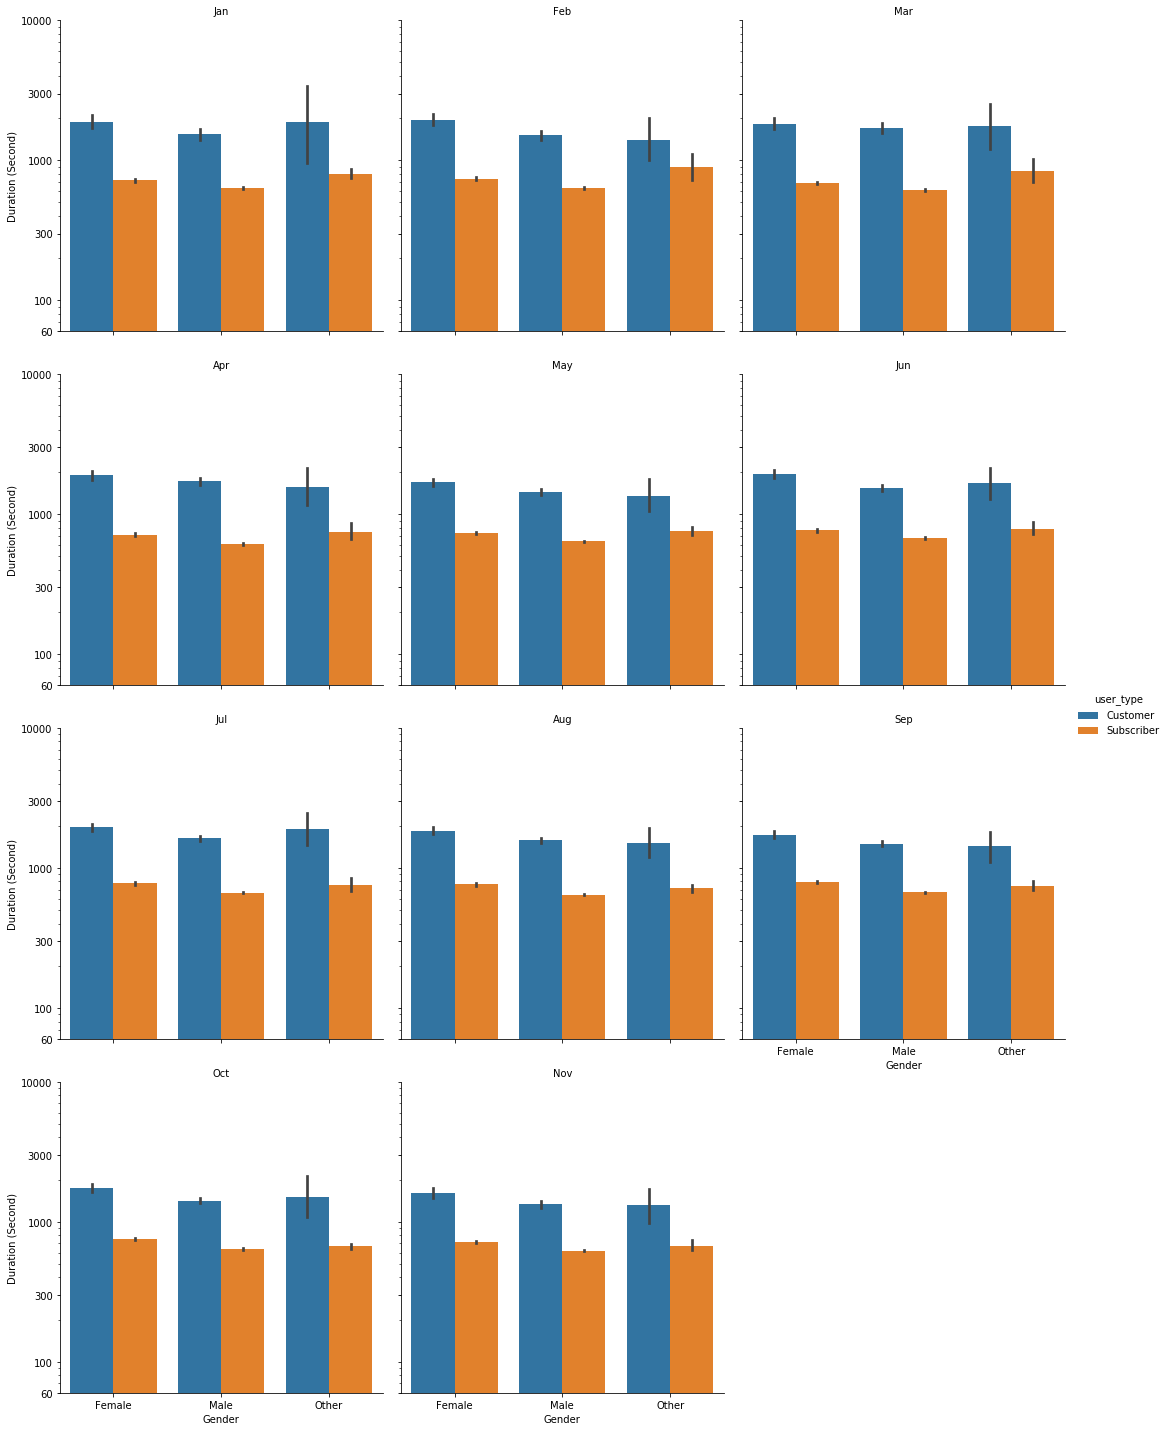

In [48]:
plt.figure(figsize=[30, 120])
g = sb.catplot(data=trips_clean, x='member_gender',y='duration_sec',col='start_month',hue='user_type', kind='bar', col_wrap=3)
g.set_titles('{col_name}')
g.set_xlabels('Gender')
g.set_ylabels('Duration (Second)')
g.set(yscale='log')
g.set(ylim = np.array([60, 10000]))
g.set(yticks = dur_log_ticks_lim)
g.set_yticklabels(dur_log_ticks_lim)
plt.show()

By month level, we can see that the female and other gender groups' trip duration are both longer than male user group.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For casual users, they have more number of trips on weekend almost in every month except the May, August and Noverber and the differences in these exception months are quit small. While for the member, the number of trips on weekdays is greater than that of weekends.

For the exploration on the trips' duration, the casual users have longer duration than the member in terms of day of week in each month (Jan-Nov).

At last I seperate the trip duration on user gender with different user types. And result shows that no matter of the user types, the female user have the longer trip duration than the male user.

### Were there any interesting or surprising interactions between features?

For the exploration on the trips' duration, the casual users have longer duration than the member in terms of day of week in each month (Jan-Nov).

Another interesting thing is that, female user mean trip duration is longer than that of male user in each day of week as shown above. 